# Demonstrate of Pandas time series plotting

In [1]:
import pandas as pd
from control import tf, step_response, c2d
import matplotlib.pyplot as plt

# Sample time
Ts = 0.5

# 2 systems
sys1 = c2d(tf(1, [2, 1]), Ts)
sys2 = c2d(tf(1, [5, 1]), Ts)

In [2]:
# Simulate both systems
K = pd.RangeIndex(0, 50, name='Sample (k)')
T = pd.Index(Ts*K, name='Time (s)')
T_out, y_out1 = step_response(sys1, T)  # Note: T is a pd.Index but still works here
T_out, y_out2 = step_response(sys2, T)

# Convert outputs to Pandas series
ts1 = pd.Series(y_out1, index=T, name='System 1')
ts2 = pd.Series(y_out2, index=T, name='System 2')

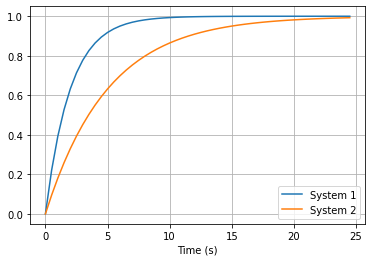

In [3]:
# Both lines on same plot
ts1.plot()
ts2.plot()
plt.grid()
plt.legend()
plt.show()

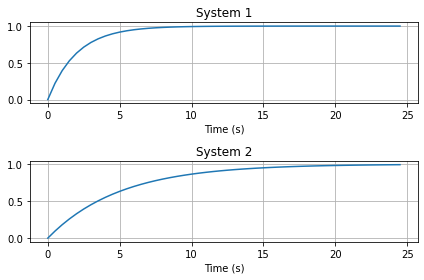

In [4]:
# Lines on separate plots
fig, axes = plt.subplots(2, 1)

ax = axes[0]
ts1.plot(ax=ax, title='System 1')
ax.grid()
ax = axes[1]
ts2.plot(ax=ax, title='System 2')
ax.grid()
plt.tight_layout()
plt.show()

## Use of Pandas datetime index

This is arguably less useful for control system design since we don't usually care about minutes, hours, or the date

In [5]:
# Simulate both systems
Ts = 0.5
K = pd.RangeIndex(0, 50, name='Sample (k)')
T = pd.TimedeltaIndex(Ts*K, unit='s', name='Time (s)')
T_out, y_out1 = step_response(sys1, T.total_seconds())
T_out, y_out2 = step_response(sys2, T.total_seconds())

# Convert outputs to Pandas series
ts1 = pd.Series(y_out1, index=T, name='System 1')
ts2 = pd.Series(y_out2, index=T, name='System 2')

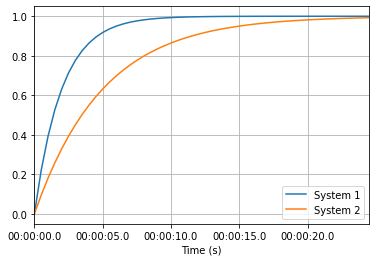

In [6]:
# Both lines on same plot
ts1.plot()
ts2.plot()
plt.grid()
plt.legend()
plt.show()

## Problem: Pandas plotting does not seem to have a step plot option

In [7]:
# ts1.plot(kind='step')  # raises ValueError: step is not a valid plot kind
